In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/ML_proj/ 

In [ ]:
!pip install -r reqs.txt

     |████████████████████████████████| 15.7 MB 5.0 MB/s 
     |████████████████████████████████| 13.5 MB 39.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |██████████████████████████████▎ | 834.1 MB 990 kB/s eta 0:00:49tcmalloc: large alloc 1147494400 bytes == 0x39724000 @  0x7f23e04af615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 19 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: torch
    Found existing installat

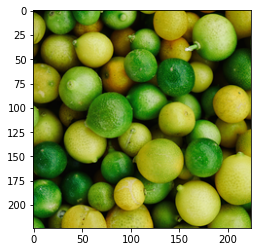

In [ ]:
from skimage.transform import resize
import os
import numpy as np
from utils.accuracies import (avg_PSNR, avg_SSIM)
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

DATA_DIR = "datasets/"
DEV_TRUE_IMAGES = np.load(os.path.join(DATA_DIR, "dev_true_images.npy"))

true = DEV_TRUE_IMAGES[1]
plt.imshow(np.moveaxis(true, 0, -1))

# Prediction

In [ ]:
!python3 SupResV1.1.py --mode "predict" --dataDir "datasets"  --weights "model_files/v11.pt" --predictionsFile "v11_predictions.npy"

python3: can't open file 'SupResV1.1.py': [Errno 2] No such file or directory


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32.13570747768066
0.8929684564604173


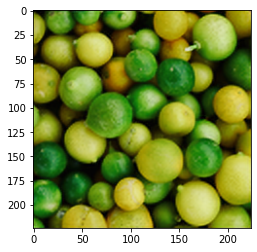

In [ ]:

PRED_IMAGES = np.load("v11_predictions.npy")
pred = PRED_IMAGES[1]
plt.imshow(np.moveaxis(pred, 0, -1))
print(avg_PSNR(pred , true))
print(avg_SSIM(pred , true))

# Baseline

In [ ]:
!python baseline_dev.py

Loading from datasets/
Nearest neighbor interpolation dev PSNR:  24.733815956345484
Nearest neighbor  interpolation dev SSIM:  0.8220986808296665
Bi-linear interpolation dev PSNR:  25.09319142412357
Bi-linear interpolation dev SSIM:  0.8082283671258276
Bi-bicubic interpolation dev PSNR:  26.324529378190736
Bi-bicubic interpolation dev SSIM:  0.8540694180420081


28.768603709908305
0.8710333619625023


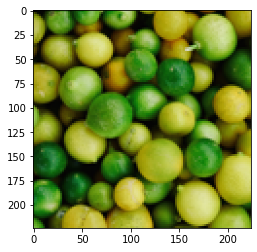

In [ ]:
NEIGHBOR_IMAGES = np.load("neighbor.npy")
pred = NEIGHBOR_IMAGES[1]
plt.imshow(np.moveaxis(pred, 0, -1))
print(avg_PSNR(pred , true))
print(avg_SSIM(pred , true))

30.23179813132653
0.8818276214324555


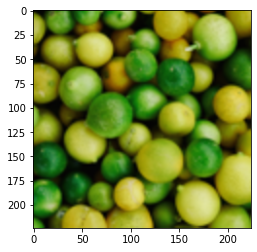

In [ ]:
BILINEAR_IMAGES = np.load("bilinear.npy")
pred = BILINEAR_IMAGES[1]
plt.imshow(np.moveaxis(pred, 0, -1))
print(avg_PSNR(pred , true))
print(avg_SSIM(pred , true))


31.755096556457193
0.9012084325880503


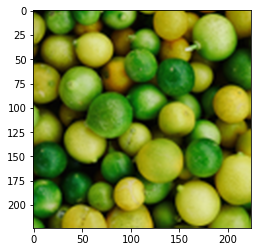

In [ ]:
BICUBIC_IMAGES = np.load("bicubic.npy")

pred = BICUBIC_IMAGES[1]
plt.imshow(np.moveaxis(pred, 0, -1))
print(avg_PSNR(pred , true))
print(avg_SSIM(pred , true))

# Visualize Result

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('./drive/MyDrive/cs_475_final')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

log1 = pd.read_csv("log_files/SupRes_fsrcnn_res_1.log", names = ['step', 'train_loss', 'train_PSNR', 'train_SSIM','dev_loss', 'dev_PSNR', 'dev_SSIM'], delimiter = ",", header = None, index_col = None)
log2 = pd.read_csv("log_files/selnet_lr0.003.log", names = ['step', 'train_loss', 'train_PSNR', 'train_SSIM','dev_loss', 'dev_PSNR', 'dev_SSIM'], delimiter = ",", header = None, index_col = None)

In [ ]:
step1 = log1['step'][2:]
train_loss1 = log1['train_loss'][2:]
dev_loss1 = log1['dev_loss'][2:]
train_PSNR1 = log1['train_PSNR'][2:]
dev_PSNR1 = log1['dev_PSNR'][2:]
train_SSIM1 = log1['train_SSIM'][2:]
dev_SSIM1 = log1['dev_SSIM'][2:]

step2 = log2['step'][2:]
train_loss2 = log2['train_loss'][2:]
dev_loss2 = log2['dev_loss'][2:]
train_PSNR2 = log2['train_PSNR'][2:]
dev_PSNR2 = log2['dev_PSNR'][2:]
train_SSIM2 = log2['train_SSIM'][2:]
dev_SSIM2 = log2['dev_SSIM'][2:]


for i in range(len(step1)):
  i = i+2
  step1[i] = float(step1[i])
  train_loss1[i] = float(train_loss1[i])
  dev_loss1[i] = float(dev_loss1[i])
  train_PSNR1[i] = float(train_PSNR1[i])
  dev_PSNR1[i] = float(dev_PSNR1[i])
  train_SSIM1[i] = float(train_SSIM1[i])
  dev_SSIM1[i] = float(dev_SSIM1[i])

  step2[i] = float(step2[i])
  train_loss2[i] = float(train_loss2[i])
  dev_loss2[i] = float(dev_loss2[i])
  train_PSNR2[i] = float(train_PSNR2[i])
  dev_PSNR2[i] = float(dev_PSNR2[i])
  train_SSIM2[i] = float(train_SSIM2[i])
  dev_SSIM2[i] = float(dev_SSIM2[i])


Text(0.5, 1.0, 'L1 Loss(3x_selnet)')

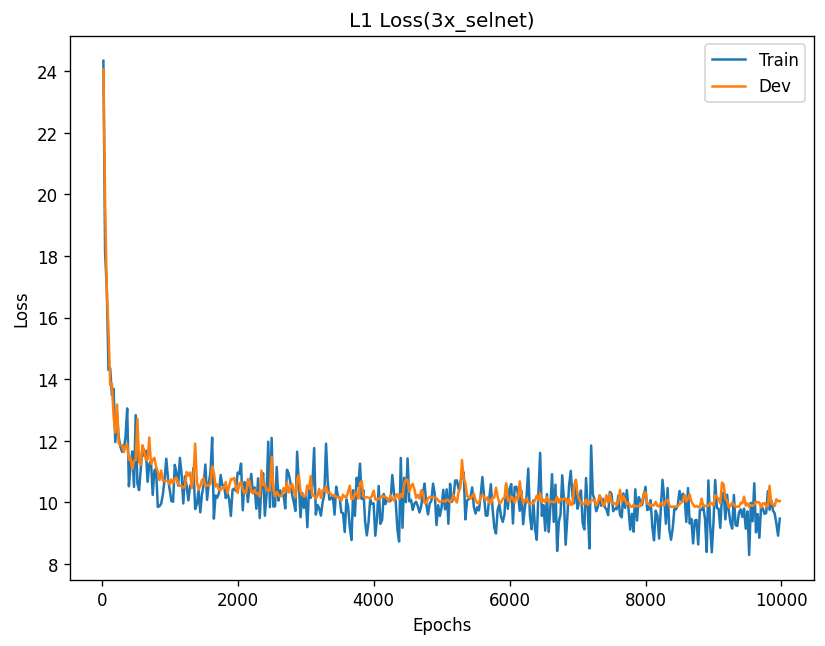

In [ ]:
from matplotlib.pyplot import figure
import numpy as np

figure(figsize=(8, 6), dpi=120)
plt.plot(step2, train_loss2, label = "Train")
plt.plot(step2, dev_loss2, label = "Dev")
#plt.plot(log_4x_fsrcnn['step'][2:], log_4x_fsrcnn['train_loss'][2:], label = "Train")
#plt.plot(log_4x_fsrcnn['step'][2:], log_4x_fsrcnn['dev_loss'][2:], label = "Dev")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('L1 Loss(3x_selnet)')


Text(0.5, 1.0, 'PSNR(3x_selnet)')

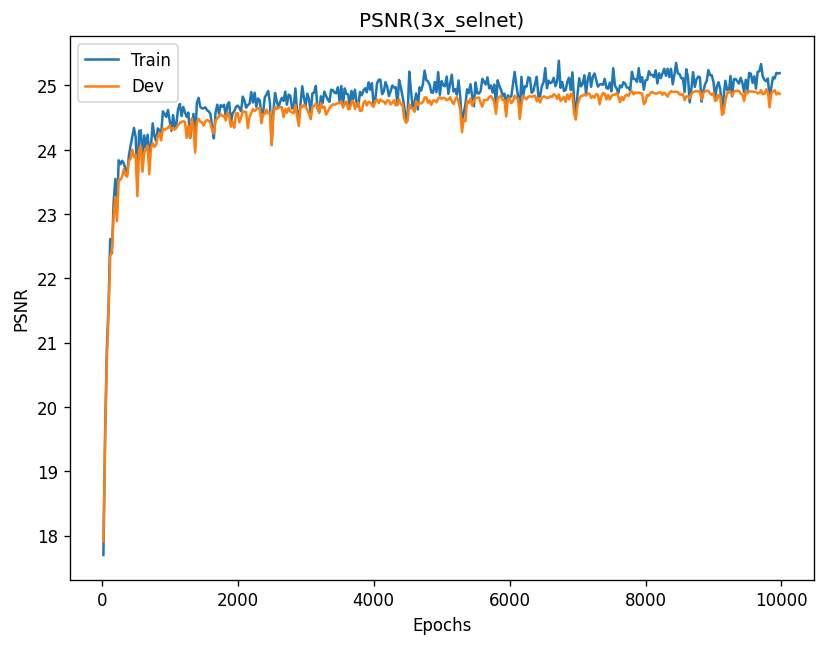

In [ ]:
figure(figsize=(8, 6), dpi=120)
plt.plot(step2, train_PSNR2, label = "Train")
plt.plot(step2, dev_PSNR2, label = "Dev")
plt.xlabel('Epochs')
plt.ylabel('PSNR')
plt.legend()
plt.title('PSNR(3x_selnet)')

Text(0.5, 1.0, 'Average PSNR on Dev Set(3x_selnet)')

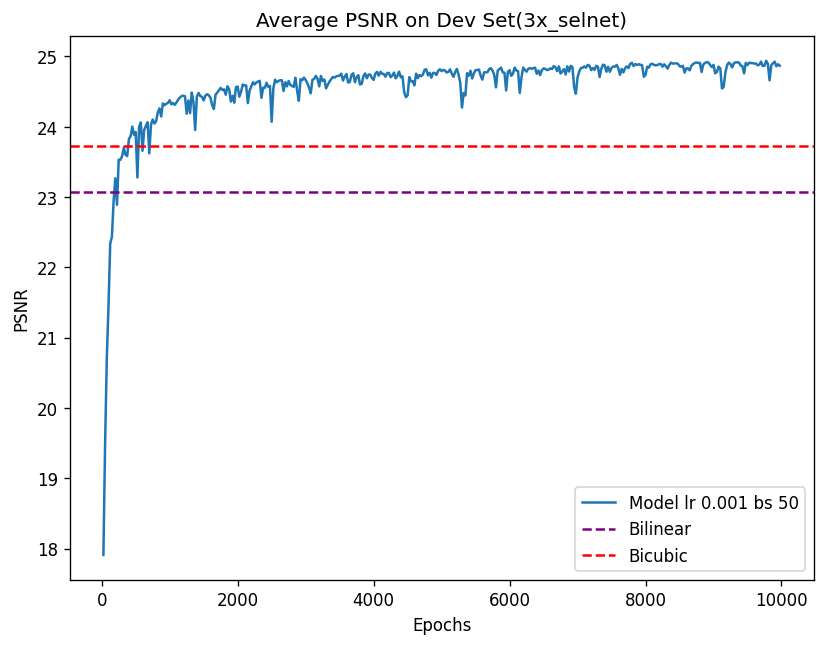

In [ ]:
figure(figsize=(8, 6), dpi=120)
plt.plot(step2, dev_PSNR2, label = "Model lr 0.001 bs 50")
#plt.axhline(y=24.64,  linestyle='--', color = 'green', label = "NearestNeighbor")
plt.axhline(y=23.063,  linestyle='--', color = 'purple', label = "Bilinear")
plt.axhline(y=23.729,  linestyle='--', color = 'red', label = "Bicubic")
plt.xlabel('Epochs')
plt.ylabel('PSNR')
plt.legend()
plt.title('Average PSNR on Dev Set(3x_selnet)')

Text(0.5, 1.0, 'Average PSNR(upscaling_factor=2)')

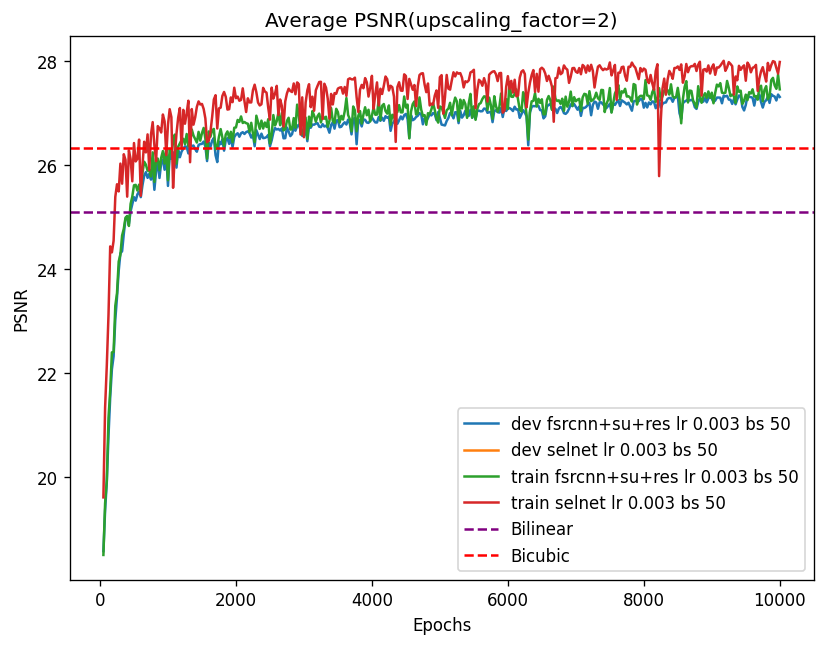

In [ ]:
figure(figsize=(8, 6), dpi=120)
plt.plot(step1[1:400], dev_PSNR1[1:400], label = "dev fsrcnn+su+res lr 0.003 bs 50")
plt.plot(step2[1:400], dev_PSNR2[1:400], label = "dev selnet lr 0.003 bs 50")
plt.plot(step1[1:400], train_PSNR1[1:400], label = "train fsrcnn+su+res lr 0.003 bs 50")
plt.plot(step2[1:400], train_PSNR2[1:400], label = "train selnet lr 0.003 bs 50")
#plt.axhline(y=24.64,  linestyle='--', color = 'green', label = "NearestNeighbor")
plt.axhline(y=25.09,  linestyle='--', color = 'purple', label = "Bilinear")
plt.axhline(y=26.32,  linestyle='--', color = 'red', label = "Bicubic")
plt.xlabel('Epochs')
plt.ylabel('PSNR')
plt.legend()
plt.title('Average PSNR(upscaling_factor=2)')

Text(0.5, 1.0, 'SSIM(3x_selnet)')

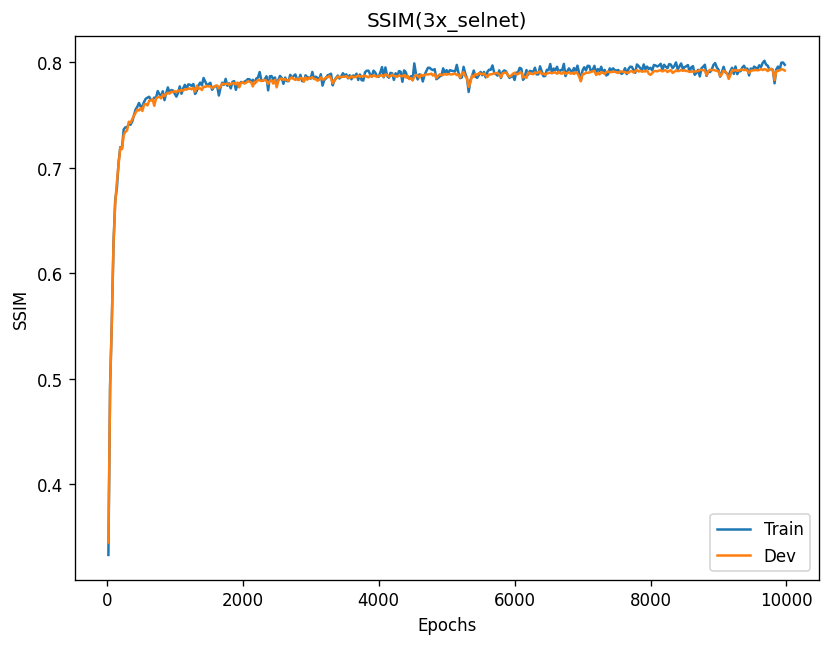

In [ ]:
figure(figsize=(8, 6), dpi=120)
plt.plot(step2, train_SSIM2, label = "Train")
plt.plot(step2, dev_SSIM2, label = "Dev")
plt.xlabel('Epochs')
plt.ylabel('SSIM')
plt.legend()
plt.title('SSIM(3x_selnet)')

Text(0.5, 1.0, 'Average SSIM on Dev Set(3x_selnet)')

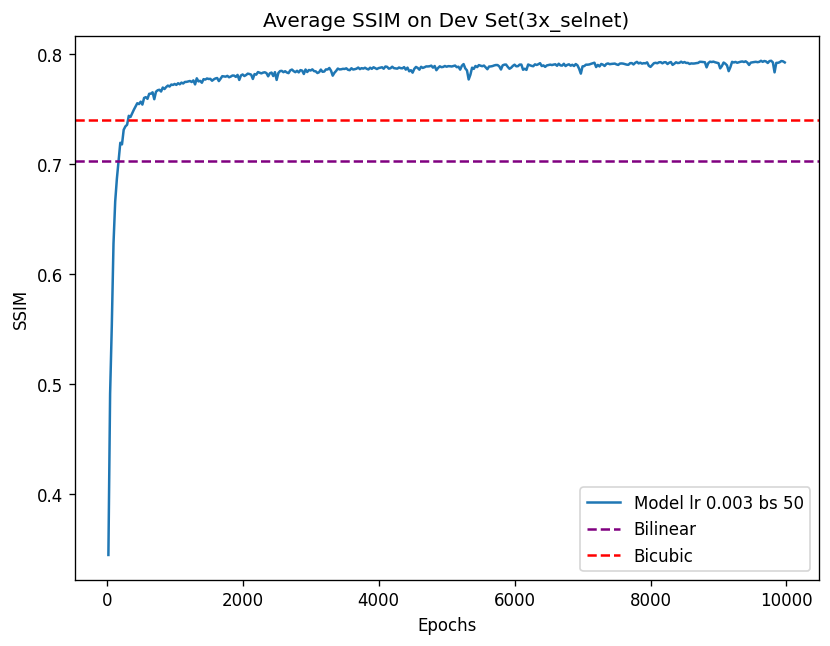

In [ ]:
figure(figsize=(8, 6), dpi=120)
plt.plot(step2, dev_SSIM2, label = "Model lr 0.003 bs 50")
#plt.axhline(y=0.81,  linestyle='--', color = 'green', label = "NearestNeighbor")
plt.axhline(y=0.703,  linestyle='--', color = 'purple', label = "Bilinear")
plt.axhline(y=0.740,  linestyle='--', color = 'red', label = "Bicubic")
plt.xlabel('Epochs')
plt.ylabel('SSIM')
plt.legend()
plt.title('Average SSIM on Dev Set(3x_selnet)')

Text(0.5, 1.0, 'Average SSIM(upscaling_factor=2)')

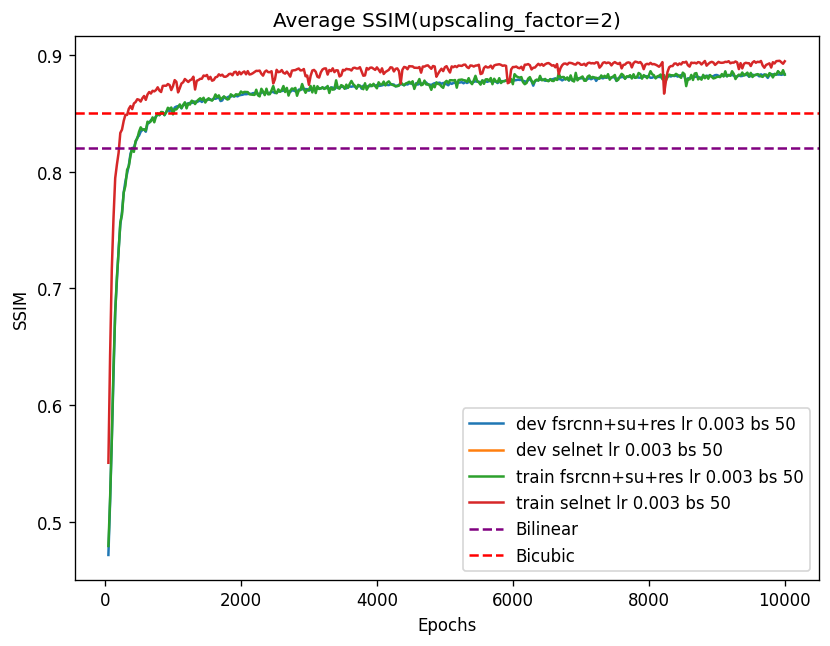

In [ ]:
figure(figsize=(8, 6), dpi=120)
plt.plot(step1[1:400], dev_SSIM1[1:400], label = "dev fsrcnn+su+res lr 0.003 bs 50")
plt.plot(step2[1:400], dev_SSIM2[1:400], label = "dev selnet lr 0.003 bs 50")
plt.plot(step1[1:400], train_SSIM1[1:400], label = "train fsrcnn+su+res lr 0.003 bs 50")
plt.plot(step2[1:400], train_SSIM2[1:400], label = "train selnet lr 0.003 bs 50")
#plt.axhline(y=0.81,  linestyle='--', color = 'green', label = "NearestNeighbor")
plt.axhline(y=0.82,  linestyle='--', color = 'purple', label = "Bilinear")
plt.axhline(y=0.85,  linestyle='--', color = 'red', label = "Bicubic")
plt.xlabel('Epochs')
plt.ylabel('SSIM')
plt.legend()
plt.title('Average SSIM(upscaling_factor=2)')

In [ ]:
!ls log_files/


'10(3)x5.log'		  SupRes.log		    v1.1_bs50_lr0.03_.log
'6(3)x5_lr0.01bs50.log'   SupResv11.log		    v1.1_bs50_lr0.3_.log
'6(3)x6_prelu.log'	  v1.1_bs50_lr0.0003_.log


Text(0.5, 1.0, 'Average PSNR on Dev Set')

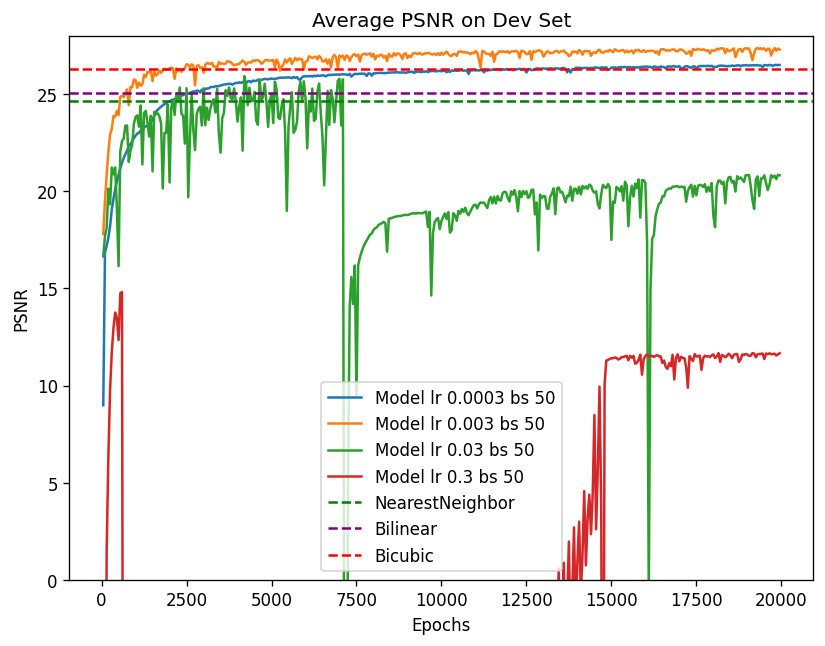

In [ ]:
figure(figsize=(8, 6), dpi=120)
log1 = pd.read_csv("log_files/v1.1_bs50_lr0.0003_.log", names = ['Epochs', 'TrainLoss', 'TrainPSNR', 'TrainSSIM','DevLoss', 'DevPSNR', 'DevSSIM'], header = 0, index_col = None)
log2 = pd.read_csv("log_files/v1.1_bs50_lr0.03_.log", names = ['Epochs', 'TrainLoss', 'TrainPSNR', 'TrainSSIM','DevLoss', 'DevPSNR', 'DevSSIM'], header = 0, index_col = None)
log3 = pd.read_csv("log_files/v1.1_bs50_lr0.3_.log", names = ['Epochs', 'TrainLoss', 'TrainPSNR', 'TrainSSIM','DevLoss', 'DevPSNR', 'DevSSIM'], header = 0, index_col = None)
plt.plot(log1['Epochs'][1:], log1['DevPSNR'][1:], label = "Model lr 0.0003 bs 50")
plt.plot(log['Epochs'][1:], log['DevPSNR'][1:], label = "Model lr 0.003 bs 50")
plt.plot(log2['Epochs'][1:], log2['DevPSNR'][1:], label = "Model lr 0.03 bs 50")
plt.plot(log3['Epochs'][1:], log3['DevPSNR'][1:], label = "Model lr 0.3 bs 50")
plt.axhline(y=24.64,  linestyle='--', color = 'green', label = "NearestNeighbor")
plt.axhline(y=25.09,  linestyle='--', color = 'purple', label = "Bilinear")
plt.axhline(y=26.32,  linestyle='--', color = 'red', label = "Bicubic")
plt.xlabel('Epochs')
plt.ylabel('PSNR')
plt.ylim(0, 28) 
plt.legend()
plt.title('Average PSNR on Dev Set')

Text(0.5, 1.0, 'Average SSIM on Dev Set')

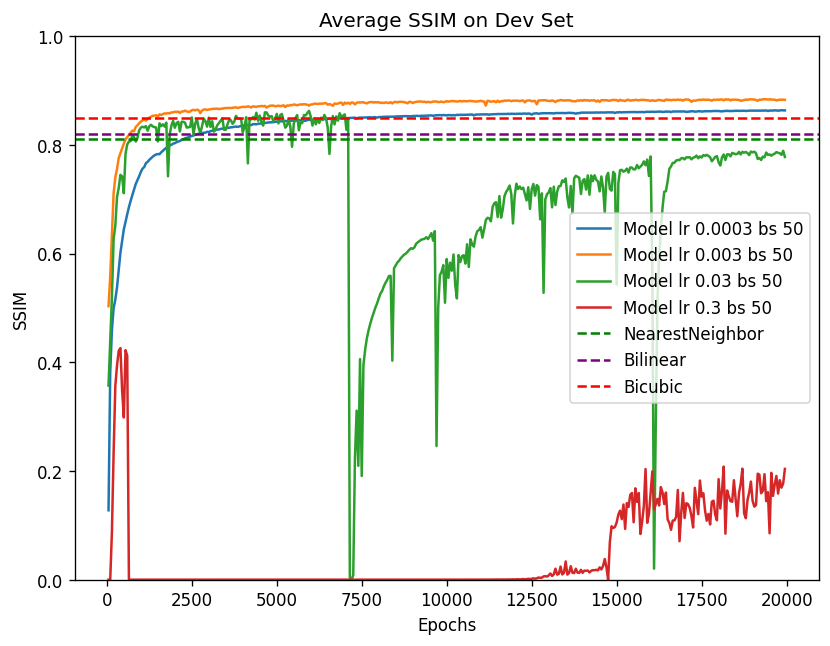

In [ ]:
figure(figsize=(8, 6), dpi=120)
log1 = pd.read_csv("log_files/v1.1_bs50_lr0.0003_.log", names = ['Epochs', 'TrainLoss', 'TrainPSNR', 'TrainSSIM','DevLoss', 'DevPSNR', 'DevSSIM'], header = 0, index_col = None)
log2 = pd.read_csv("log_files/v1.1_bs50_lr0.03_.log", names = ['Epochs', 'TrainLoss', 'TrainPSNR', 'TrainSSIM','DevLoss', 'DevPSNR', 'DevSSIM'], header = 0, index_col = None)
log3 = pd.read_csv("log_files/v1.1_bs50_lr0.3_.log", names = ['Epochs', 'TrainLoss', 'TrainPSNR', 'TrainSSIM','DevLoss', 'DevPSNR', 'DevSSIM'], header = 0, index_col = None)
plt.plot(log1['Epochs'][1:], log1['DevSSIM'][1:], label = "Model lr 0.0003 bs 50")
plt.plot(log['Epochs'][1:], log['DevSSIM'][1:], label = "Model lr 0.003 bs 50")
plt.plot(log2['Epochs'][1:], log2['DevSSIM'][1:], label = "Model lr 0.03 bs 50")
plt.plot(log3['Epochs'][1:], log3['DevSSIM'][1:], label = "Model lr 0.3 bs 50")
plt.axhline(y=0.81,  linestyle='--', color = 'green', label = "NearestNeighbor")
plt.axhline(y=0.82,  linestyle='--', color = 'purple', label = "Bilinear")
plt.axhline(y=0.85,  linestyle='--', color = 'red', label = "Bicubic")
plt.xlabel('Epochs')
plt.ylabel('SSIM')
plt.ylim(0, 1) 
plt.legend()
plt.title('Average SSIM on Dev Set')

In [ ]:
log1

,Epochs,TrainLoss,TrainPSNR,TrainSSIM,DevLoss,DevPSNR,DevSSIM
0,0,112.569946,6.185830,0.010759,108.257301,6.542476,0.008967
1,50,76.217720,8.565239,0.124973,78.273781,8.988639,0.127629
2,100,26.632343,16.547474,0.384246,28.118095,16.843573,0.381834
3,150,27.072147,17.048715,0.467212,26.454330,17.202100,0.459503
4,200,26.990528,17.324552,0.504047,24.979393,17.615049,0.499461
...,...,...,...,...,...,...,...
395,19750,8.088940,26.564841,0.862045,8.371411,26.459759,0.862778
396,19800,9.087978,26.739470,0.865713,8.297956,26.511538,0.863245
397,19850,8.675128,26.752062,0.865513,8.352063,26.514032,0.863517
398,19900,8.692152,26.637248,0.864571,8.355036,26.505487,0.863369


Loading from datasets/
(800, 3, 112, 112)
(800, 3, 224, 224)


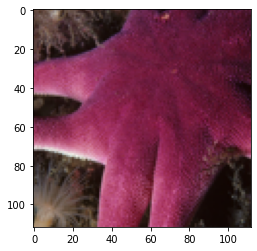

In [ ]:
from skimage.transform import resize
import os
import numpy as np
from utils.accuracies import (avg_PSNR, avg_SSIM)
import matplotlib.pyplot as plt


DATA_DIR = "datasets/"
print("Loading from", DATA_DIR)
TRAIN_COMP_IMAGES = np.load(os.path.join(DATA_DIR, "train_comp_images.npy"))
TRAIN_TRUE_IMAGES = np.load(os.path.join(DATA_DIR, "train_true_images.npy"))
DEV_COMP_IMAGES = np.load(os.path.join(DATA_DIR, "dev_comp_images.npy"))
DEV_TRUE_IMAGES = np.load(os.path.join(DATA_DIR, "dev_true_images.npy"))

################
# Train images
################
# interpolation
print(TRAIN_COMP_IMAGES.shape)
print(TRAIN_TRUE_IMAGES.shape)
plt.imshow(np.moveaxis(TRAIN_COMP_IMAGES[0], 0, -1))





Computing train
(3, 112, 112)
(1, 3, 224, 224)
Bi-linear interpolation train PSNR:  24.865147429249305
Bi-linear interpolation train SSIM:  0.5498324138013906
Bi-bicubic interpolation train PSNR:  25.278760794237915
Bi-bicubic interpolation train SSIM:  0.5972486919900186


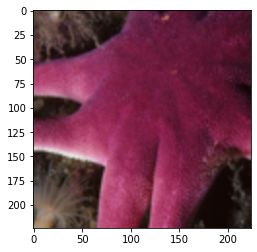

In [ ]:
print("Computing train")
bilinear = []
bicubic = []
i= TRAIN_COMP_IMAGES[0]
plt.imshow(np.moveaxis(i, 0, -1))
#i = np.moveaxis(i, 0, -1)
print(i.shape)
l = resize(i, (3, 224, 224), order = 1, preserve_range=True)  #bilinear interpolation
l = l.astype(np.int64)
bilinear.append(l)
c = resize(i, (3, 224, 224), order = 3, preserve_range=True)  #bicubic interpolation
c = c.astype(np.int64)
bicubic.append(c)
bilinear = np.array(bilinear)
print(bilinear.shape)
plt.imshow(np.moveaxis(bilinear[0], 0, -1))

bicubic = np.array(bicubic)

# compute PSNR and SSIM
# bilinear
bilinear_psnr = avg_PSNR(bilinear, TRAIN_TRUE_IMAGES)
bilinear_ssim = avg_SSIM(bilinear, TRAIN_TRUE_IMAGES)
print("Bi-linear interpolation train PSNR: ", bilinear_psnr )
print("Bi-linear interpolation train SSIM: ", bilinear_ssim )
# bicubic
bicubic_psnr = avg_PSNR(bicubic , TRAIN_TRUE_IMAGES)
bicubic_ssim = avg_SSIM(bicubic , TRAIN_TRUE_IMAGES)
print("Bi-bicubic interpolation train PSNR: ", bicubic_psnr )
print("Bi-bicubic interpolation train SSIM: ", bicubic_ssim )

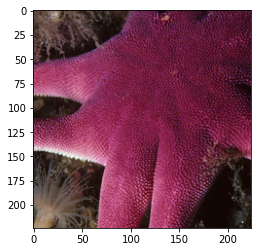

In [ ]:
i= TRAIN_TRUE_IMAGES[0]
plt.imshow(np.moveaxis(i, 0, -1))

Computing train
(800, 3, 224, 224)
Bi-linear interpolation train PSNR:  25.29031575273784
Bi-linear interpolation train SSIM:  0.8097353808895532
Bi-bicubic interpolation train PSNR:  26.496049991743806
Bi-bicubic interpolation train SSIM:  0.8550578167684445
Bi-linear interpolation dev PSNR:  25.09319142412357
Bi-linear interpolation dev SSIM:  0.8082283671258276
Bi-bicubic interpolation dev PSNR:  26.324529378190736
Bi-bicubic interpolation dev SSIM:  0.8540694180420081


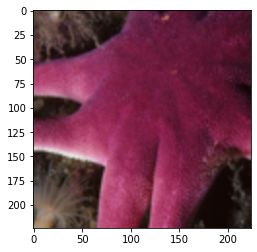

In [ ]:
print("Computing train")
bilinear = []
bicubic = []
for i in TRAIN_COMP_IMAGES:
    l = resize(i, (3, 224, 224), order = 1, preserve_range=True)  #bilinear interpolation
    l = l.astype(np.uint8)
    bilinear.append(l)
    c = resize(i, (3, 224, 224), order = 3, preserve_range=True)  #bicubic interpolation
    c = c.astype(np.uint8)
    bicubic.append(c)
bilinear = np.array(bilinear)
print(bilinear.shape)
plt.imshow(np.moveaxis(bilinear[0], 0, -1))
bicubic = np.array(bicubic)

# compute PSNR and SSIM
# bilinear
bilinear_psnr = avg_PSNR(bilinear, TRAIN_TRUE_IMAGES)
bilinear_ssim = avg_SSIM(bilinear, TRAIN_TRUE_IMAGES)
print("Bi-linear interpolation train PSNR: ", bilinear_psnr )
print("Bi-linear interpolation train SSIM: ", bilinear_ssim )
# bicubic
bicubic_psnr = avg_PSNR(bicubic , TRAIN_TRUE_IMAGES)
bicubic_ssim = avg_SSIM(bicubic , TRAIN_TRUE_IMAGES)
print("Bi-bicubic interpolation train PSNR: ", bicubic_psnr )
print("Bi-bicubic interpolation train SSIM: ", bicubic_ssim )





################
# Dev images
################
# interpolation
bilinear = []
bicubic = []
for i in DEV_COMP_IMAGES:
    l = resize(i, (3, 224, 224), order = 1, preserve_range=True)  #bilinear interpolation
    l = l.astype(np.uint8)
    bilinear.append(l)
    c = resize(i, (3, 224, 224), order = 3, preserve_range=True)  #bicubic interpolation
    c = c.astype(np.uint8)
    bicubic.append(c)
bilinear = np.array(bilinear)
bicubic = np.array(bicubic)

# compute PSNR and SSIM
# bilinear
bilinear_psnr = avg_PSNR(bilinear, DEV_TRUE_IMAGES)
bilinear_ssim = avg_SSIM(bilinear, DEV_TRUE_IMAGES)
print("Bi-linear interpolation dev PSNR: ", bilinear_psnr )
print("Bi-linear interpolation dev SSIM: ", bilinear_ssim )
# bicubic
bicubic_psnr = avg_PSNR(bicubic , DEV_TRUE_IMAGES)
bicubic_ssim = avg_SSIM(bicubic , DEV_TRUE_IMAGES)
print("Bi-bicubic interpolation dev PSNR: ", bicubic_psnr )
print("Bi-bicubic interpolation dev SSIM: ", bicubic_ssim )

In [ ]:
!python main_SupRes.py --mode "train" \
                        --dataDir "datasets" \
                        --logDir "log_files" \
                        --modelSaveDir "model_files" \
                        --LR 0.01 \
                        --bs 50 \
                        --epochs 2000

On step 0:	Train loss 108.67366790771484	Train PSNR 6.228157848089861	Train SSIM 0.019992074358640408	Dev loss 106.31874084472656	Dev PSNR 6.648366441869461	Dev SSIM 0.01700441076041354
On step 10:	Train loss 44.03749084472656	Train PSNR 14.594005957661953	Train SSIM 0.2160566385193344	Dev loss 35.63969421386719	Dev PSNR 14.889993120472388	Dev SSIM 0.22646829480240047
On step 20:	Train loss 31.173749923706055	Train PSNR 15.695502595275386	Train SSIM 0.2812481487193972	Dev loss 31.559797286987305	Dev PSNR 16.038240218198652	Dev SSIM 0.2871308382319959
On step 30:	Train loss 29.408594131469727	Train PSNR 16.436677728562387	Train SSIM 0.3779466540064121	Dev loss 28.482580184936523	Dev PSNR 16.733226540466823	Dev SSIM 0.3727112871007283
On step 40:	Train loss 26.461477279663086	Train PSNR 16.60772976538103	Train SSIM 0.41305882076399386	Dev loss 27.70580291748047	Dev PSNR 16.93193807344387	Dev SSIM 0.40683732158789854
On step 50:	Train loss 27.035202026367188	Train PSNR 16.980195168331182	

In [ ]:
!python main_SupRes.py --mode "train" \
                        --dataDir "datasets" \
                        --logDir "log_files" \
                        --modelSaveDir "model_files" \
                        --LR 0.02 \
                        --bs 50 \
                        --epochs 2000

On step 0:	Train loss 110.83810424804688	Train PSNR 6.039707264874669	Train SSIM -0.0024907307685791452	Dev loss 110.43255615234375	Dev PSNR 6.411478762848011	Dev SSIM -0.002175665719494632
On step 100:	Train loss 28.66286849975586	Train PSNR 16.828714126294244	Train SSIM 0.46353177885433794	Dev loss 27.593076705932617	Dev PSNR 17.27812012919552	Dev SSIM 0.46431045520402975
On step 200:	Train loss 24.831039428710938	Train PSNR 18.339070087425874	Train SSIM 0.5913675531313995	Dev loss 22.563617706298828	Dev PSNR 18.736854368026542	Dev SSIM 0.5964132629567754
On step 300:	Train loss 24.10503387451172	Train PSNR 18.414284682878982	Train SSIM 0.6600811508714233	Dev loss 22.0397891998291	Dev PSNR 19.03287995115536	Dev SSIM 0.6671052659447119
On step 400:	Train loss 20.861366271972656	Train PSNR 19.148244047719732	Train SSIM 0.7099793017042793	Dev loss 20.790645599365234	Dev PSNR 19.67024925532438	Dev SSIM 0.7135533511809744
On step 500:	Train loss 20.054943084716797	Train PSNR 19.8040037891

In [ ]:
!python main_SupRes.py --mode "train" \
                        --dataDir "datasets" \
                        --logDir "log_files" \
                        --modelSaveDir "model_files" \
                        --LR 0.01 \
                        --bs 50 \
                        --epochs 2000

On step 0:	Train loss 114.08174133300781	Train PSNR 6.1357600508998384	Train SSIM 0.011812928211594503	Dev loss 107.54800415039062	Dev PSNR 6.566781857517558	Dev SSIM 0.010613227852033526
On step 50:	Train loss 29.071739196777344	Train PSNR 16.447123269929474	Train SSIM 0.40933715470333687	Dev loss 27.987689971923828	Dev PSNR 16.764604641447807	Dev SSIM 0.40508849909970057
On step 100:	Train loss 27.02712631225586	Train PSNR 16.873283040030575	Train SSIM 0.44229365164966994	Dev loss 27.11773681640625	Dev PSNR 17.131027522486644	Dev SSIM 0.4342073621023589
On step 150:	Train loss 27.280061721801758	Train PSNR 17.48324709254345	Train SSIM 0.5087593123528581	Dev loss 25.065153121948242	Dev PSNR 17.730871476028362	Dev SSIM 0.5011279210118815
On step 200:	Train loss 24.48642349243164	Train PSNR 17.95869619984186	Train SSIM 0.5909585584843223	Dev loss 23.908437728881836	Dev PSNR 18.326034706151457	Dev SSIM 0.5921502081001477
On step 250:	Train loss 23.516258239746094	Train PSNR 18.2703970839

In [ ]:
!python main_SupRes.py --mode "train" \
                        --dataDir "datasets" \
                        --logDir "log_files" \
                        --modelSaveDir "model_files" \
                        --LR 0.001 \
                        --bs 100 \
                        --epochs 2000

main_SupRes.py:185: UserWarning: Using a target size (torch.Size([100, 3, 224, 224])) that is different to the input size (torch.Size([100, 3, 220, 220])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.l1_loss(restored, y)
Traceback (most recent call last):
  File "main_SupRes.py", line 185, in <module>
    loss = F.l1_loss(restored, y)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py", line 3080, in l1_loss
    expanded_input, expanded_target = torch.broadcast_tensors(input, target)
  File "/usr/local/lib/python3.7/dist-packages/torch/functional.py", line 72, in broadcast_tensors
    return _VF.broadcast_tensors(tensors)  # type: ignore[attr-defined]
RuntimeError: The size of tensor a (220) must match the size of tensor b (224) at non-singleton dimension 3
